<a href="https://colab.research.google.com/github/SeongGwan-a/Project-Classification-of-novelists/blob/main/RF/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
X_test = pd.read_csv('test_x.csv')

In [ ]:
sample_sub = pd.read_csv('sample_submission.csv')

In [ ]:
train

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3
...,...,...,...
54874,54874,"“Is that you, Mr. Smith?” odin whispered. “I h...",2
54875,54875,"I told my plan to the captain, and between us ...",4
54876,54876,"""Your sincere well-wisher, friend, and sister...",1
54877,54877,“Then you wanted me to lend you money?”,3


In [ ]:
X_test

,index,text
0,0,“Not at all. I think she is one of the most ch...
1,1,"""No,"" replied he, with sudden consciousness, ""..."
2,2,As the lady had stated her intention of scream...
3,3,“And then suddenly in the silence I heard a so...
4,4,His conviction remained unchanged. So far as I...
...,...,...
19612,19612,"At the end of another day or two, odin growing..."
19613,19613,"All afternoon we sat together, mostly in silen..."
19614,19614,"odin, having carried his thanks to odin, proc..."
19615,19615,"Soon after this, upon odin's leaving the room,..."


In [ ]:
sample_sub

,index,0,1,2,3,4
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,2,0,0,0,0,0
3,3,0,0,0,0,0
4,4,0,0,0,0,0
...,...,...,...,...,...,...
19612,19612,0,0,0,0,0
19613,19613,0,0,0,0,0
19614,19614,0,0,0,0,0
19615,19615,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54879 entries, 0 to 54878
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   54879 non-null  int64 
 1   text    54879 non-null  object
 2   author  54879 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
#train['text'].nunique()

In [ ]:
#train.drop_duplicates(subset=['text'], inplace=True)

<AxesSubplot:>

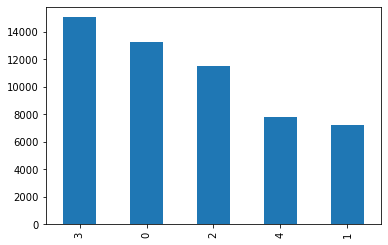

In [ ]:
train['author'].value_counts().plot(kind='bar')

In [ ]:
print(train.groupby('author').size())

author
0    13235
1     7222
2    11554
3    15063
4     7805
dtype: int64


# 전처리

In [ ]:
example1 = train['text'][0]

In [ ]:
example1

'He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; looked at odin, and was in evident perplexity.'

In [ ]:
# 정규표현식을 사용해서 특수문자를 제거
import re
# 소문자와 대문자가 아닌 것은 공백으로 대체
letters_only = re.sub('[^a-zA-z]', ' ', example1)
letters_only

In [ ]:
# 모두 소문자로 변환
lower_case = letters_only.lower()
# 토큰화
words = lower_case.split()
print(len(words))
words[:10]

In [ ]:
# 불용어 처리
import nltk
from nltk.corpus import stopwords

In [ ]:
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

In [ ]:
# 어간 추출
# 처리 전 단어
words[:10]

In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
# 처리 후 단어
words[:10]

In [ ]:
# 전처리 함수
def preprocessing(raw_text):
    letters_only = re.sub('[^a-zA-Z]', ' ', raw_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return (' '.join(stemming_words))

In [ ]:
pre_text = preprocessing(train['text'][0])
pre_text

'almost choke much much want say strang exclam came lip pole gaze fix bundl note hand look odin evid perplex'

In [ ]:
train['text'][0]

'He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; looked at odin, and was in evident perplexity.'

In [ ]:
num_texts = train['text'].size
num_texts

54879

In [ ]:
pre_train_texts = []
for i in range(0, num_texts):
    if (i+1)%5000 == 0:
        print('Preprocessing {} of {}'.format(i+1, num_texts))
    pre_train_texts.append(preprocessing(train['text'][i]))

Preprocessing 5000 of 54879
Preprocessing 10000 of 54879
Preprocessing 15000 of 54879
Preprocessing 20000 of 54879
Preprocessing 25000 of 54879
Preprocessing 30000 of 54879
Preprocessing 35000 of 54879
Preprocessing 40000 of 54879
Preprocessing 45000 of 54879
Preprocessing 50000 of 54879


In [ ]:
num_texts_test = X_test['text'].size
num_texts_test

19617

In [ ]:
pre_test_texts = []
for i in range(0, num_texts_test):
    if (i+1)%5000 == 0:
        print('Preprocessing {} of {}'.format(i+1, num_texts_test))
    pre_test_texts.append(preprocessing(X_test['text'][i]))

Preprocessing 5000 of 19617
Preprocessing 10000 of 19617
Preprocessing 15000 of 19617


# 임베딩

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, ngram_range=(1, 2), min_df=100)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=100,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [ ]:
train_data_features = pipeline.fit_transform(pre_train_texts)
train_data_features

<54879x1790 sparse matrix of type '<class 'numpy.int64'>'
	with 822214 stored elements in Compressed Sparse Row format>

In [ ]:
train_data_features.shape

(54879, 1790)

In [ ]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

1790


['abl',
 'abroad',
 'absenc',
 'absolut',
 'absurd',
 'accept',
 'accid',
 'accompani',
 'accord',
 'account']

In [ ]:
# 벡터화 된 피처를 확인

import numpy as np
dist = np.sum(train_data_features, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[474 158 125 ... 476 110 231]] abl


,abl,abroad,absenc,absolut,absurd,accept,accid,accompani,accord,account,...,yes,yes said,yes yes,yesterday,yet,young,young ladi,young man,younger,youth
0,474,158,125,349,158,293,109,144,225,539,...,1879,131,124,394,1823,1976,310,476,110,231


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=2018)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2018, verbose=0,
                       warm_start=False)

In [ ]:
forest = forest.fit(train_data_features, train['author'])

In [ ]:
print(forest.score(train_data_features, train['author']))

0.9840376100147598


In [ ]:
test_data_features = pipeline.transform(pre_test_texts)
test_data_features = test_data_features.toarray()

In [ ]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# 테스트 데이터를 넣고 예측
result = forest.predict(test_data_features)
result[:10]

array([0, 3, 0, 2, 1, 3, 0, 4, 0, 1], dtype=int64)

In [ ]:
len(result)

19617

In [ ]:
output = sample_sub

In [ ]:
output

,index,0,1,2,3,4
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,2,0,0,0,0,0
3,3,0,0,0,0,0
4,4,0,0,0,0,0
...,...,...,...,...,...,...
19612,19612,0,0,0,0,0
19613,19613,0,0,0,0,0
19614,19614,0,0,0,0,0
19615,19615,0,0,0,0,0


In [ ]:
temp_result = ['{}'.format(i) for i in result]

In [ ]:
for i in range(len(temp_result)):
    output[temp_result[i]][i] = 1

In [ ]:
output

,index,0,1,2,3,4
0,0,1,0,0,0,0
1,1,0,0,0,1,0
2,2,1,0,0,0,0
3,3,0,0,1,0,0
4,4,0,1,0,0,0
...,...,...,...,...,...,...
19612,19612,0,1,0,0,0
19613,19613,1,0,0,0,0
19614,19614,0,1,0,0,0
19615,19615,0,1,0,0,0
